In [1]:
import math
import random as rand
import string
from pprint import pformat, pprint
from typing import List, Tuple, Dict

def k_means(k: int, data: List[Tuple[int]], iteration_limit: int = 10, tolerance: float = 1e-4) -> Dict[str, List[Tuple[int, int]]]:
    # Get mins and maxes of x and y coordinates
    x_min = min([x for x, _ in data])
    x_max = max([x for x, _ in data])
    y_min = min([y for _, y in data])
    y_max = max([y for _, y in data])

    # Create initial clusters
    alphabet = list(string.ascii_uppercase)
    clusters = {}
    centroids = {}
    prev_centroids = {} # Used to keep track of previous centroids
    for i in range(k):
        name = alphabet[i]
        clusters[name] = []

        initial_x = rand.randint(x_min, x_max)
        initial_y = rand.randint(y_min, y_max)

        centroids[name] = [initial_x, initial_y]
        prev_centroids[name] = [initial_x, initial_y]


    print({'Initial cetroids: ': centroids})

    # Assign points to clusters until iteration limit is reached
    for i in range(iteration_limit):
        print(f"Iteration {i+1}")
        # Clear cluster assignments
        for name, _ in clusters.items():
            clusters[name] = []

        # Iterate over all data points
        for x, y in data:
            distances = {} # This is to hold the distances to each cluster
            
            # For every cluster location, get the distance from the point to
            # the cluster
            for name, (x_c, y_c) in centroids.items():
                dist = math.sqrt((x-x_c)**2 + (y-y_c)**2)
                distances[name] = dist
                
            print(distances)
            # Assign the point to a cluster based on the smallest distance
            chosen_cluster = [name for name, _ in sorted(distances.items(), key=lambda x: x[1])][0]
            clusters[chosen_cluster].append([x, y])

        # Recalculate the centroid location
        for name, assignments in clusters.items():
            # Calculate the x and y means of the new cluster assignments
            # This will eventually minimize the distance between the data and the centroids
            if assignments:
                x_mean = sum([x for x, _ in assignments]) / len(assignments)
                y_mean = sum([y for _, y in assignments]) / len(assignments)

                centroids[name] = [x_mean, y_mean]

        # Check to see if the centroid location stayed the same from the previous iteration
        converged = True
        for name in centroids.keys():
            old_x, old_y = prev_centroids[name]
            new_x, new_y = centroids[name]
            # If the centroid location changed, it didn't converge
            if abs(old_x - new_x) > tolerance or abs(old_y - new_y) > tolerance:
                converged = False

            # Else, it did
            else:
                converged = True

        # If all centroids stayed the same, exit early
        if converged:
            print(f"Clusters stopped changing at iteration {i+1}")
            for name in centroids.keys():
                print(pformat({f"Previous centroid {name}: ": prev_centroids[name]}))
            break

    return (clusters, centroids)

k = 2
data = [(1, 2), (1, 3), (2, 2), (8, 9), (9, 8), (8, 8)]
iteration_limit = 2
clusters, centroids = k_means(k=k, data=data, iteration_limit=iteration_limit)
pprint({'Clusters': clusters, 'Centroids': centroids})

{'Initial cetroids: ': {'A': [1, 3], 'B': [9, 2]}}
Iteration 1
{'A': 1.0, 'B': 8.0}
{'A': 0.0, 'B': 8.06225774829855}
{'A': 1.4142135623730951, 'B': 7.0}
{'A': 9.219544457292887, 'B': 7.0710678118654755}
{'A': 9.433981132056603, 'B': 6.0}
{'A': 8.602325267042627, 'B': 6.082762530298219}
Iteration 2
{'A': 0.47140452079103173, 'B': 9.68962790249909}
{'A': 0.7453559924999298, 'B': 9.067647005823629}
{'A': 0.74535599249993, 'B': 8.956685895029603}
{'A': 9.428090415820634, 'B': 0.7453559924999296}
{'A': 9.533566430716728, 'B': 0.7453559924999296}
{'A': 8.749603165604459, 'B': 0.4714045207910325}
{'Centroids': {'A': [1.3333333333333333, 2.3333333333333335],
               'B': [8.333333333333334, 8.333333333333334]},
 'Clusters': {'A': [[1, 2], [1, 3], [2, 2]], 'B': [[8, 9], [9, 8], [8, 8]]}}


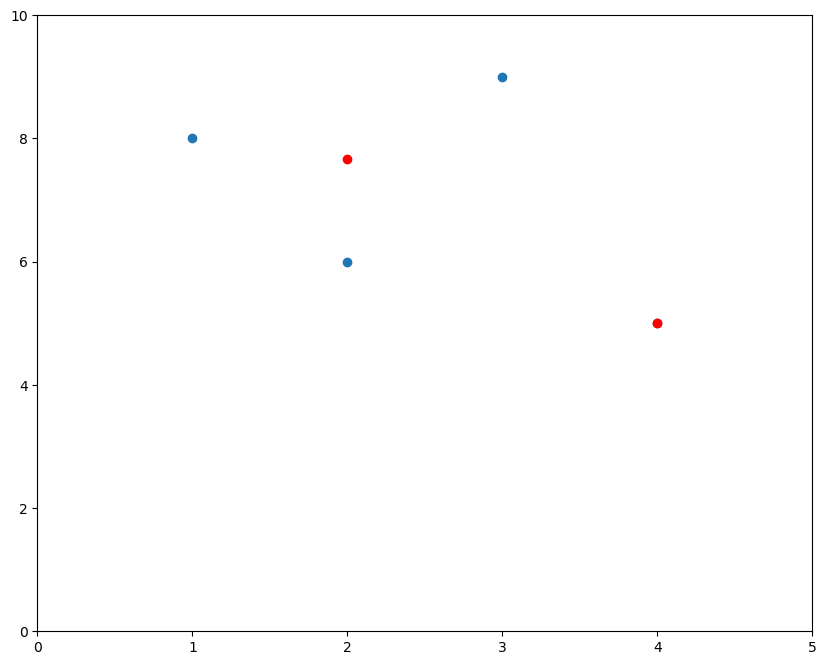

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.xlim((0, 5))
plt.ylim((0, 10))

# Plot data points
plt.scatter(x=[x for x, _ in data], y=[y for _, y in data])

# Plot centroids
for name, (x_c, y_c) in centroids.items():
    plt.scatter(x=[x_c], y=[y_c], c='r')

plt.show()